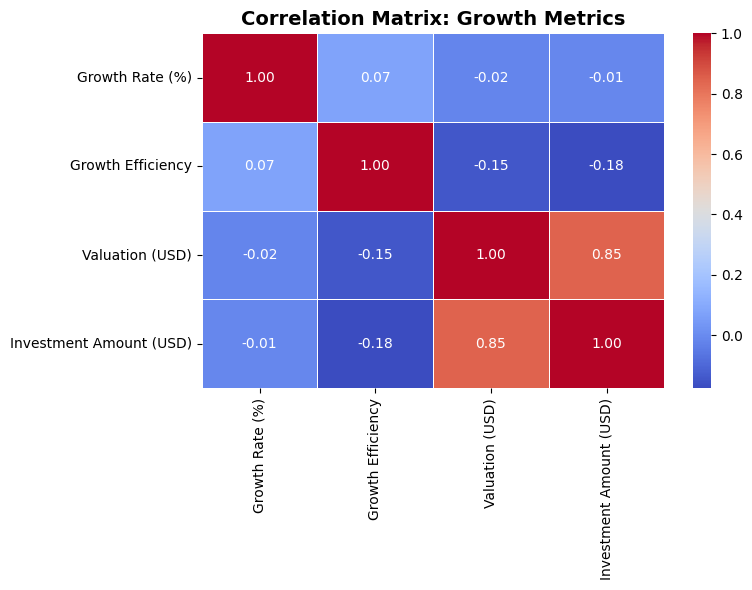

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
path = r'C:\Users\Georges Ghosn\Desktop\startup_growth_investment_data.csv'
df = pd.read_csv(path)

# Rename column if needed (verify column names)
df.rename(columns=lambda x: x.strip(), inplace=True)

# Create Growth Efficiency if not exists
if 'Growth Efficiency' not in df.columns:
    df['Growth Efficiency'] = df['Growth Rate (%)'] / df['Investment Amount (USD)']

# Select numerical columns
numerical_cols = ['Growth Rate (%)', 'Growth Efficiency', 'Valuation (USD)', 'Investment Amount (USD)']

# Correlation matrix
corr = df[numerical_cols].corr()

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix: Growth Metrics", fontsize=14, fontweight="bold")
plt.tight_layout()
plt.show()


In [23]:
!pip install plotly


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import pandas as pd
import plotly.express as px

# ===== Step 1: Load your data =====
path = r'C:\Users\Georges Ghosn\Desktop\startup_growth_investment_data.csv'
df = pd.read_csv(path)

# ===== Step 2: Check column names =====
print(df.columns)

# ===== Step 3: Calculate Growth Efficiency =====
# Formula (Example) -> Efficiency = Growth Rate (%) * Valuation / Investment
# You can adjust formula logic here based on your project meaning
df['Growth Efficiency'] = (df['Growth Rate (%)'] * df['Valuation (USD)']) / df['Investment Amount (USD)']

# ===== Step 4: Group & Clean =====
df_grouped = df.groupby(['Year Founded', 'Industry']).agg({
    'Growth Efficiency': 'mean',
    'Investment Amount (USD)': 'mean'
}).reset_index()

# ===== Step 5: Scale for better visibility =====
df_grouped['Growth Efficiency (x1e6)'] = df_grouped['Growth Efficiency'] * 1e6

# ===== Step 6: Animated Scatter Plot =====
fig = px.scatter(
    df_grouped,
    x='Investment Amount (USD)',
    y='Growth Efficiency (x1e6)',
    color='Industry',
    animation_frame='Year Founded',
    size='Investment Amount (USD)',
    hover_name='Industry',
    title='🎥 Yearly Movement: Investment vs Growth Efficiency (Scaled)',
    labels={'Growth Efficiency (x1e6)': 'Growth Efficiency (x10⁶)'},
    log_x=True,
    height=600
)

fig.update_layout(template='plotly_white')

# ===== Step 7: Save & Show =====
fig.write_html(r'C:\Users\Georges Ghosn\Desktop\animated_growth_efficiency.html')
fig.show()


Index(['Startup Name', 'Industry', 'Funding Rounds', 'Investment Amount (USD)',
       'Valuation (USD)', 'Number of Investors', 'Country', 'Year Founded',
       'Growth Rate (%)'],
      dtype='object')


C:\Users\Georges Ghosn\AppData\Local\Temp\ipykernel_11004\2737510525.py:45: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Georges Ghosn\AppData\Local\Temp\ipykernel_11004\2737510525.py:48: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  plt.savefig(r'C:\Users\Georges Ghosn\Desktop\Industry_Radar_Chart_Colored.png', dpi=300)
C:\Users\Georges Ghosn\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128640 (\N{ROCKET}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


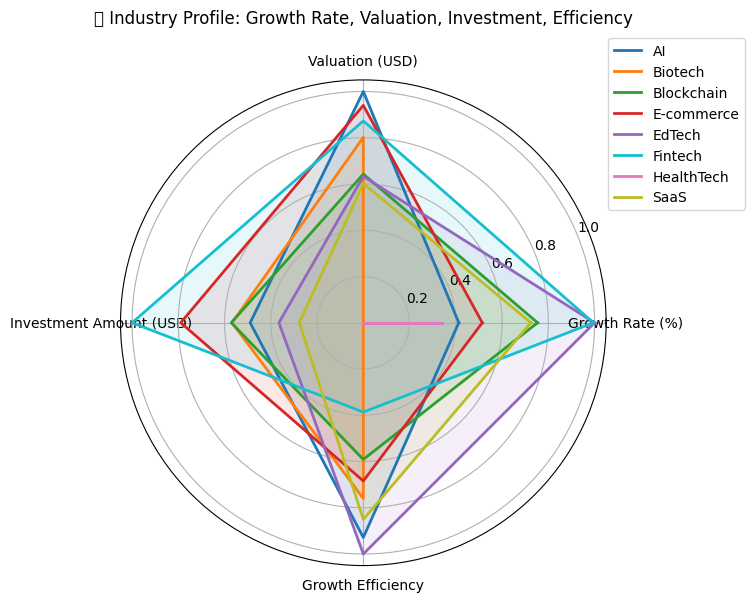

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from math import pi
from sklearn.preprocessing import MinMaxScaler

# ====== Step 1: Load Data ======
path = r'C:\Users\Georges Ghosn\Desktop\startup_growth_investment_data.csv'
df = pd.read_csv(path)

# ====== Step 2: Create Growth Efficiency Column ======
df['Growth Efficiency'] = df['Valuation (USD)'] / df['Investment Amount (USD)']

# ====== Step 3: Group & Normalize ======
df_grouped = df.groupby('Industry').agg({
    'Growth Rate (%)': 'mean',
    'Valuation (USD)': 'mean',
    'Investment Amount (USD)': 'mean',
    'Growth Efficiency': 'mean'
}).reset_index()

# Normalize
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_grouped.iloc[:, 1:]), columns=df_grouped.columns[1:])
df_scaled['Industry'] = df_grouped['Industry']

# ====== Step 4: Plot Radar Chart ======
categories = list(df_scaled.columns[:-1])
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(8, 8))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#17becf', '#e377c2', '#bcbd22']

for i, row in df_scaled.iterrows():
    values = row[:-1].tolist()
    values += values[:1]
    plt.polar(angles, values, label=row['Industry'], color=colors[i], linewidth=2)
    plt.fill(angles, values, color=colors[i], alpha=0.1)

plt.xticks(angles[:-1], categories, size=10)
plt.title('🚀 Industry Profile: Growth Rate, Valuation, Investment, Efficiency', size=12, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.grid(True)
plt.tight_layout()

# ====== Step 5: Save ======
plt.savefig(r'C:\Users\Georges Ghosn\Desktop\Industry_Radar_Chart_Colored.png', dpi=300)
plt.show()
